# Задание 7.1
### Вариант 13
Дана задача Коши для системы двух обыкновенных дифференциальных уравнений
$$
\begin{equation*}
    \begin{cases}
    u' = u / v  \\
    v' = u * v * t \\
    u(0) = 1\\
    v(0) = 1
    \end{cases}
\end{equation*}  
$$

1. Модифицировать программу решения задачи по явному методу Эйлера из лабораторной работы 6 для решения системы дифференциальных уравнений. Найти приближенное решение задачи Коши с шагом h = 0.01 на отрезке [0, 1]. Оценить величину погрешности по правилу Рунге.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import types

In [2]:
def f0(t, u, v):
    return u / v

def f1(t, u, v):
    return u * v * t



In [3]:
t_0 = 0
T = 1
y_00 = 1
y_10 = 1
h = 0.01

In [4]:
def Runge(t_0, T, y_init, h, method, p, *args):   
    u, v = method(t_0, T, y_init, h, args[0], args[1])
    u2, v2 = method(t_0, T, y_init, 2*h, args[0], args[1])
    return np.abs(u[::2] - u2) / (2**p - 1), np.abs(v[::2] - v2) / (2**p - 1)

### Метод Эйлера для системы ДУ
$$ y_{0,n+1} = y_{0,n} + h f_0(t_n, y_{0n}, y_{1n}, .., y_{mn}) $$
$$ y_{1,n+1} = y_{1,n} + h f_1(t_n, y_{0n}, y_{1n}, .., y_{mn}) $$
$$.....................................$$
$$ y_{m,n+1} = y_{m,n} + h f_m(t_n, y_{0n}, y_{1n}, .., y_{mn}) $$

In [5]:
def Euler(t_0, T, y_init, h, *args):
    n = int((T - t_0) / h) + 1
    h = (T - t_0) / (n - 1)
    
    Y = np.zeros((len(y_init), n))
    Y[:,0] = y_init
    # поэлементно
    if isinstance(args[0], types.FunctionType):
        F = np.array([args[0], args[1]])
        for i in range(n-1):
            Y[0][i+1] = Y[0][i] + h * F[0](t_0 + i*h, Y[0][i], Y[1][i])
            Y[1][i+1] = Y[1][i] + h * F[1](t_0 + i*h, Y[0][i], Y[1][i])        
     
    # в векторной форме
    else:
        A = args[0]
        for i in range(n-1):
            Y[:, i+1] = Y[:, i] + h * np.dot(A, Y[:, i])
    
    return Y

In [6]:
u_data_E, v_data_E = Euler(t_0, T, [y_00, y_10], h, f0, f1)

2. Модифицировать программу решения задачи по методу Эйлера-Коши из лабораторной работы 6 для решения системы дифференциальных уравнений. Найти приближенное решение задачи Коши с шагом h=0.01 на отрезке [0,1]. Оценить величину погрешности по правилу Рунге.

### Метод Эйлера-Коши для системы ДУ
$$ \overline{y_{0,n+1}} = y_{0,n} + h f_0(t_n, y_{0n}, y_{1n}, .., y_{mn}) $$
$$ \overline{y_{1,n+1}} = y_{1,n} + h f_1(t_n, y_{0n}, y_{1n}, .., y_{mn}) $$
$$.....................................$$
$$ \overline{y_{m,n+1}} = y_{m,n} + h f_m(t_n, y_{0n}, y_{1n}, .., y_{mn}) $$


$$ y_{0,n+1} = y_{0,n} + \frac{h}{2} (f_0(t_n, y_{0n}, y_{1n}, .., y_{mn}) + 
                               f_0(t_{n+1}, \overline{y_{0,n+1}}, .., \overline{y_{m,n+1}})) $$
$$..................................................................$$
$$ y_{m,n+1} = y_{m,n} + \frac{h}{2} (f_m(t_n, y_{0n}, y_{1n}, .., y_{mn}) + 
                               f_m(t_{n+1}, \overline{y_{0,n+1}}, .., \overline{y_{m,n+1}})) $$

In [7]:
def EulerCauchy(t_0, T, y_init, h, *args):
    n = int((T - t_0) / h) + 1
    h = (T - t_0) / (n - 1)
    
    Y = np.zeros((len(y_init), n))
    Y[:,0] = y_init
    Y_ = np.zeros((len(y_init), n))
    Y_[:,0] = y_init
    
    if isinstance(args[0], types.FunctionType):
        f0, f1 = args[0], args[1]
        for i in range(n - 1):
            Y[0][i+1] = Y[0][i] + h / 2 * (f0(t_0+i*h, Y[0][i], Y[1][i]) + 
                                           f0(t_0+(i+1)*h, Y[0][i] + h * f0(t_0+i*h, Y[0][i], Y[1][i]),
                                                           Y[1][i] + h * f1(t_0+i*h, Y[0][i], Y[1][i])))

            Y[1][i+1] = Y[1][i] + h / 2 * (f1(t_0+i*h, Y[0][i], Y[1][i]) + 
                                           f1(t_0+(i+1)*h, Y[0][i] + h * f0(t_0+i*h, Y[0][i], Y[1][i]),
                                                           Y[1][i] + h * f1(t_0+i*h, Y[0][i], Y[1][i])))
    else:
        # в векторной форме
        A = args[0]
        for i in range(n-1):
            Y_[:, i+1] = Y[:, i] + h * np.dot(A, Y[:, i])
            Y[:, i+1] = Y[:, i] + h / 2 * (np.dot(A, Y[:, i]) + np.dot(A, Y_[:, i+1]))
        
    return Y

In [8]:
u_data_EC, v_data_EC = EulerCauchy(t_0, T, [y_00, y_10], h, f0, f1)

In [9]:
u_E, v_E = Runge(t_0, T, [y_00, y_10], h, Euler, 1, f0, f1)
print('Погрешность (метод Эйлера) \n u: {:.5f} \n v: {:.5f}'.format(np.max(np.abs(u_E)), np.max(np.abs(v_E))))

Погрешность (метод Эйлера) 
 u: 0.00704 
 v: 0.03881


In [10]:
u_EC, v_EC = Runge(t_0, T, [y_00, y_10], h, EulerCauchy, 2, f0, f1)
print('Погрешность (метод Эйлера-Коши) \n u: {:.5f} \n v: {:.5f}'.format(np.max(np.abs(u_EC)), np.max(np.abs(v_EC))))

Погрешность (метод Эйлера-Коши) 
 u: 0.00008 
 v: 0.00002


3. На одном чертеже построить графики первой компоненты u(t) найденного обоими методами решения, а на другом - графики второй компоненты v(t) найденного обоими методами решения.

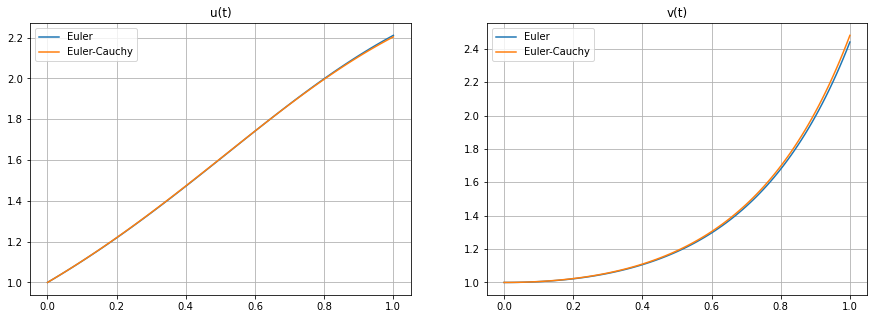

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
n = int((T - t_0) / h) + 1
t_data = np.linspace(t_0, T, n)
axes[0].set_title('u(t)')
axes[0].plot(t_data, u_data_E, label='Euler')
axes[0].plot(t_data, u_data_EC, label='Euler-Cauchy')
axes[1].set_title('v(t)')
axes[1].plot(t_data, v_data_E, label='Euler')
axes[1].plot(t_data, v_data_EC, label='Euler-Cauchy')
for ax in axes:
    ax.legend()
    ax.grid()

4. Сравнить полученные результаты $\newline$
Видим, что графики обеих компонент, найденные методами Эйлера и Эйлера-Коши, совпадают. 

# Задание 7.2
Дана задача Коши для двух систем обыкновенных дифференциальных уравнений с постоянными коэффициентами 
$$ Y'(t) = AY(t), Y(0) = Y_0$$
$$ Z'(t) = BZ(t), Z(0) = Z_0$$
где A и B – заданные матрицы, Y_0 и Z_0 -  заданные векторы.  Исследовать поведение решения систем уравнений 

A = $\begin{pmatrix}
  -206.713 & 18.011 & -23.171 \\
  -11.491 & -206.768 & -26.811 \\
 -27.004 & -22.946 & -18.519
\end{pmatrix}$ 
Y(0) = $\begin{pmatrix}
  3.2 \\
  3.6 \\
  4.0   
\end{pmatrix}$   
$\\$
B = $\begin{pmatrix}
  -113.624 & 87.954 & -145.069 \\
  -103.339 & -104.343 &244.629 \\
  134.543 &-250.572 & -210.385 
\end{pmatrix}$ 
Z(0) = $\begin{pmatrix}
  7.2 \\
  7.6 \\
  8.4 
\end{pmatrix}$   

In [12]:
A = np.array([
    [-206.713, 18.011, -23.171],
    [-11.491, -206.768, -26.811],
    [-27.004, -22.946, -18.519]
])

B = np.array([
    [-113.624, 87.954, -145.069],
    [-103.339, -104.343, 244.629],
    [134.543, -250.572, -210.385]
])
Y_0 = np.array([3.2, 3.6, 4.0])
Z_0 = np.array([7.2, 7.6, 8.4])

1. Используя встроенную функцию пакета   NUMPY для нахождения собственных чисел матриц A и B,  найти коэффициенты жесткости обеих систем. Установить какая  задача является жесткой.

найдем собственные числа матриц, чтобы определить число жесткости системы
$$s = \frac{max{|Re\lambda_k|}}{min{|Re\lambda_k|}}$$

In [13]:
eigA = np.linalg.eig(A)[0]
sA = np.max(np.abs(eigA.real)) / np.min(np.abs(eigA.real))
print('Собственные числа матрицы A: {}'.format(eigA))
print('Жесткость системы: {}'.format(sA))

Собственные числа матрицы A: [ -11.9996879  +0.j         -210.00015605+14.99998431j
 -210.00015605-14.99998431j]
Жесткость системы: 17.500468157173735


In [14]:
eigB = np.linalg.eig(B)[0]
sB = np.max(np.abs(eigB.real)) / np.min(np.abs(eigB.real))
print('Собственные числа матрицы B: {}'.format(eigB))
print('Жесткость системы: {}'.format(sB))

Собственные числа матрицы B: [-131.39686893  +0.j         -148.47756553+294.19817995j
 -148.47756553-294.19817995j]
Жесткость системы: 1.1299931781993982


Вещественные части собственных чисел матриц отрицательны. $\newline$
Системы нельзя квалифицировать как жесткие, однако у первой число жесткости больше.

2. Численно решить обе задачи  на отрезке [0,1] c шагом h=0.01 явным методом Эйлера. Определить, для какой из задач явный метод неустойчив при данном шаге h. Построить графики компонент полученного решения.

In [15]:
def make_plots(t_data, Y, title=None):
    fig, axes = plt.subplots(1, len(Y), figsize=(20, 8))
    color = ['r', 'g', 'b', 'y', 'purple']
    for i in range(len(axes)):
        axes[i].plot(t_data, Y[i], label='y'+str(i), color=color[i])
        axes[i].grid()
        axes[i].legend() 
    fig.suptitle(title + ', h = ' + str(round(t_data[1]-t_data[0], 4)), fontsize=16) 

In [16]:
t_0 = 0.
T = 1.
h = 0.01

In [17]:
n = int((T - t_0) / h) + 1
t_data = np.linspace(t_0, T, n)

In [18]:
Y_Euler = Euler(t_0, T, Y_0, h, A)
Z_Euler = Euler(t_0, T, Z_0, h, B)

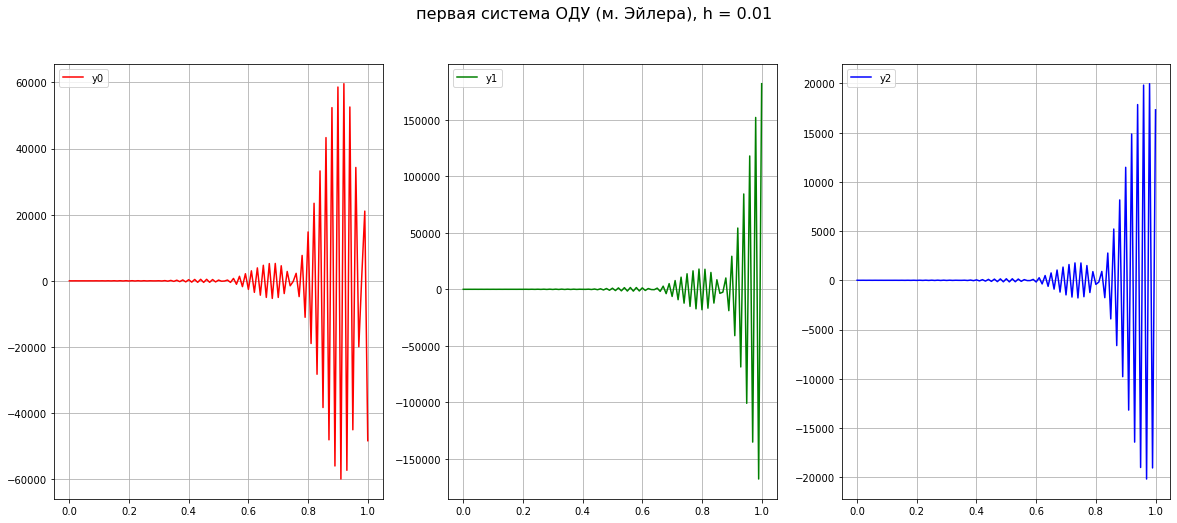

In [19]:
make_plots(t_data, Y_Euler, 'первая система ОДУ (м. Эйлера)')

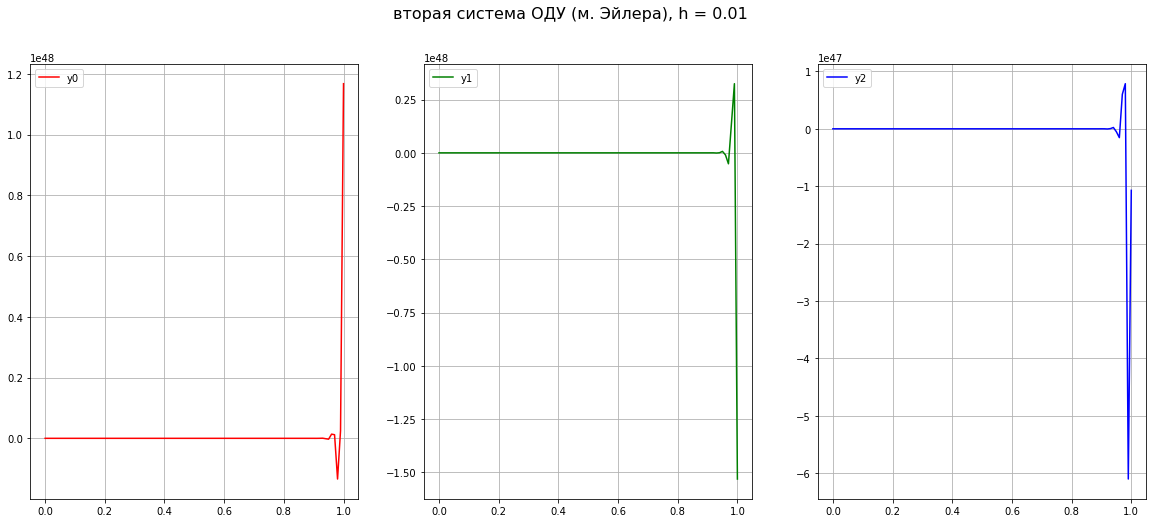

In [20]:
# вторая система ОДУ (м. Эйлера)
make_plots(t_data, Z_Euler, 'вторая система ОДУ (м. Эйлера)')

3. Численно решить обе задачи  на отрезке [0,1] c шагом h=0.01 по индивидуальному варианту из лабораторной работы 6.  Определить, для какой из задач метод неустойчив при данном шаге h. h=0.01. Построить графики компонент полученного решения. 

In [21]:
Y_EulerCauchy = EulerCauchy(t_0, T, Y_0, h, A)
Z_EulerCauchy = EulerCauchy(t_0, T, Z_0, h, B)  

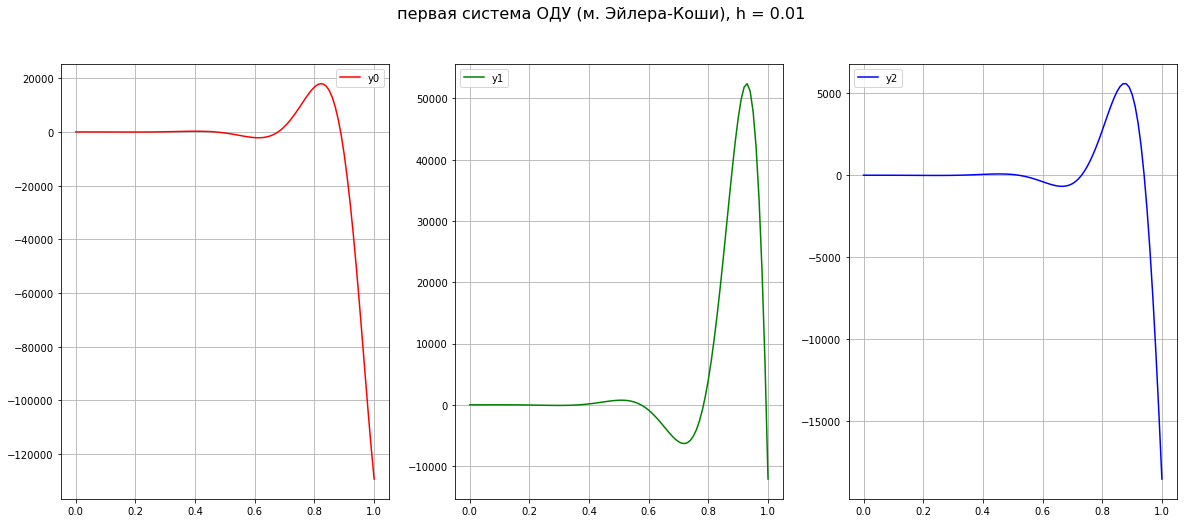

In [22]:
# первая система ОДУ (м. Эйлера-Коши)
make_plots(t_data, Y_EulerCauchy, 'первая система ОДУ (м. Эйлера-Коши)')

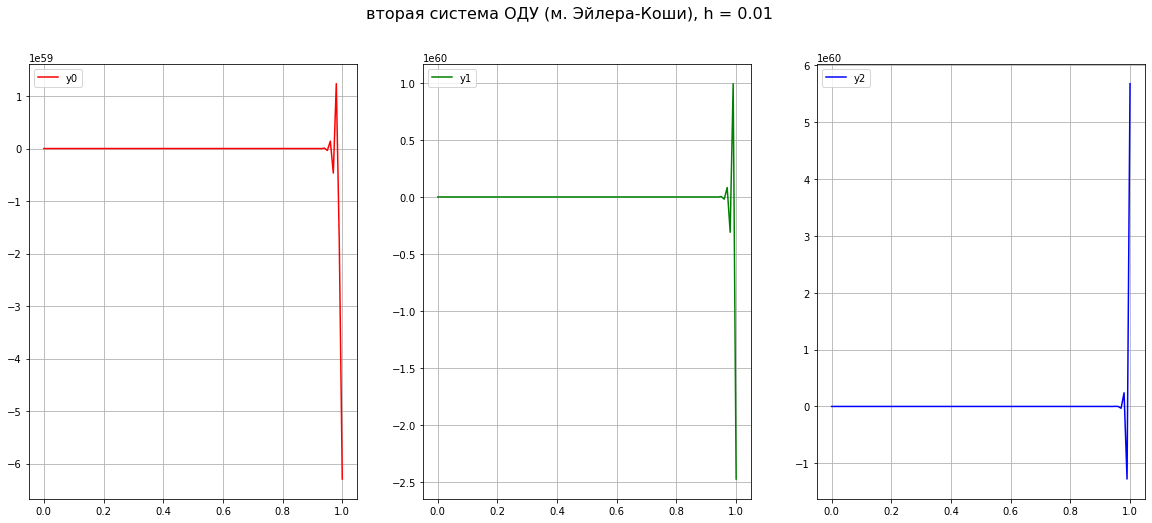

In [23]:
# вторая система ОДУ (м. Эйлера-Коши)
make_plots(t_data, Z_EulerCauchy, 'вторая система ОДУ (м. Эйлера-Коши)')

"разболтка" решения говорит о неустойчивости явных методов Эйлера и Эйлера-Коши (с разной степенью) для обеих задач, несмотря на небольшие числа жесткости.

4. Для жесткой задачи экспериментально подобрать шаг h, при котором графики компонент решения, полученного по явному методу Эйлера, визуально совпадают с графиками компонент решения, полученного по неявному методу с шагом h=0.01. Сравнить найденное значение шага с теоретическим значением шага, при котором  явный метод Эйлера для жестких задач должен быть устойчивым.

Для решения жестких задач используем А-устойчивый метод - неявный метод Эйлера - который не накладывает ограничение на шаг.

Неявный метод Эйлера   

$$Y_{n + 1} = Y_n + h A Y_{n+1} $$
$$Y_{n + 1}(E - h A) = Y_n $$
$$Y_{n + 1} = (E - h A)^{-1}{Y_n}$$ 

In [24]:
def EulerImpl(t_0, T, y_init, h, A):
    n = int((T - t_0) / h) + 1
    h = (T - t_0) / (n - 1)
    
    Y = np.zeros((len(y_init), n))
    Y[:,0] = y_init
    
    B = np.linalg.inv(np.eye(len(A)) - h * A)
    
    for i in range(n-1):
        Y[:, i+1] = np.dot(B, Y[:, i])

    return Y
    

In [25]:
Y_EulerImpl = EulerImpl(t_0, T, Y_0, h, A)
Z_EulerImpl = EulerImpl(t_0, T, Z_0, h, B)  

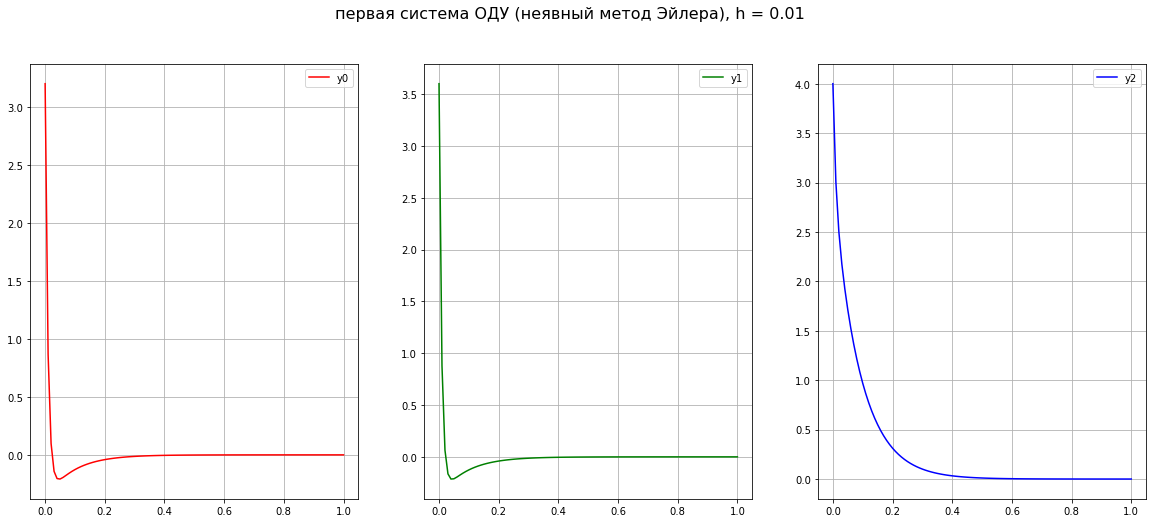

In [26]:
# первая система ОДУ (неявный метод Эйлера)
make_plots(t_data, Y_EulerImpl, 'первая система ОДУ (неявный метод Эйлера)')

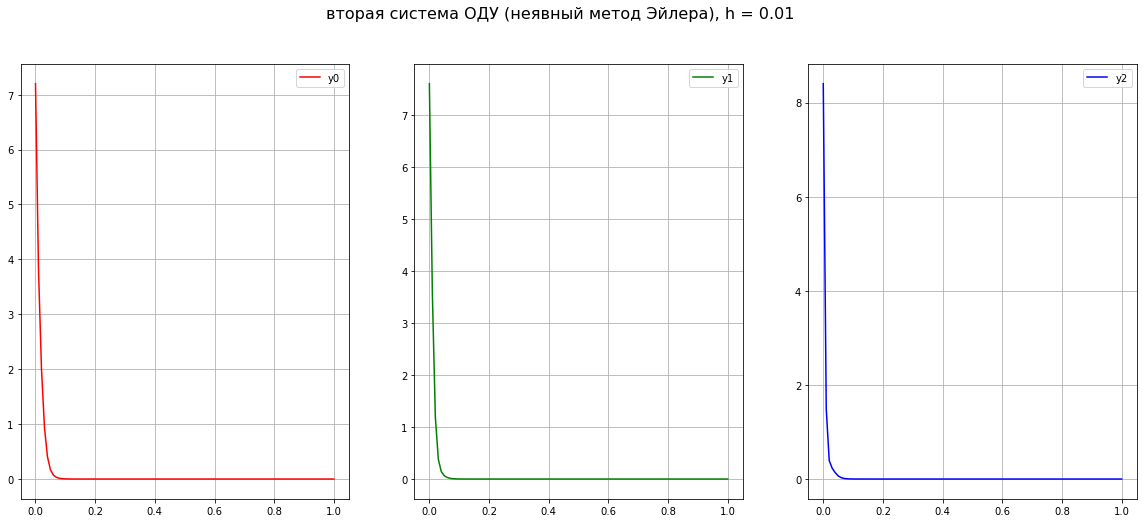

In [27]:
# вторая система ОДУ (неявный метод Эйлера)
make_plots(t_data, Z_EulerImpl, 'вторая система ОДУ (неявный метод Эйлера)')

Неявный метод Эйлера дает устойчивое решение для обеих задач.

Определим теоретический шаг, при котором явные методы Эйлера и Эйлера-Коши должны быть абсолютно устойчивы $\newline$
$$h = min{\frac{2}{|Re{\lambda_k|}}}$$

In [28]:
h_th1 = np.min(2 / np.abs(eigA.real))
print('Теоретический шаг: {:.4f}'.format(h_th1))

Теоретический шаг: 0.0095


In [29]:
n_th1 = int((T - t_0) / h_th1) + 1 
t_data1 = np.linspace(t_0, T, n_th1)

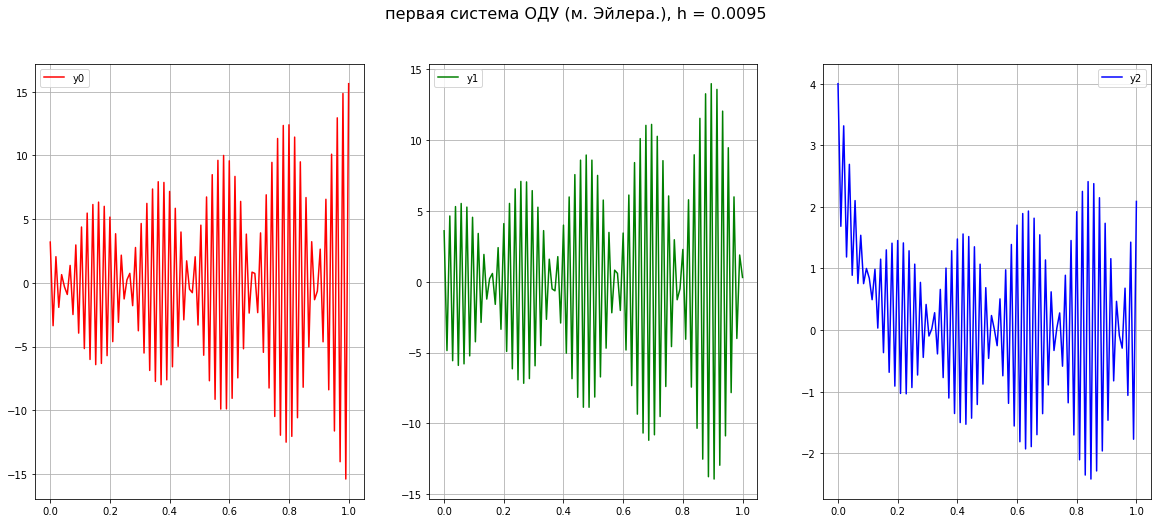

In [30]:
Y_th_Euler = Euler(t_0, T, Y_0, h_th1, A)
make_plots(t_data1, Y_th_Euler, 'первая система ОДУ (м. Эйлера.)')

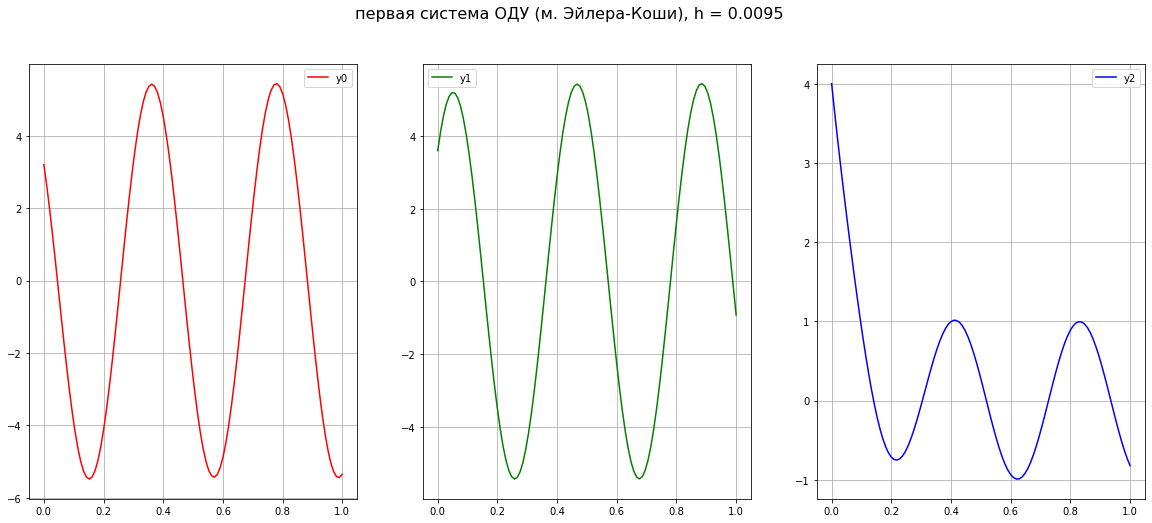

In [31]:
Y_th_EulerCauchy = EulerCauchy(t_0, T, Y_0, h_th1, A)
make_plots(t_data1, Y_th_EulerCauchy, 'первая система ОДУ (м. Эйлера-Коши)')

In [32]:
h_th2 = np.min(2 / np.abs(eigB.real))
print('Теоретический шаг: {:.4f}'.format(h_th2))

Теоретический шаг: 0.0135


In [33]:
n_th2 = int((T - t_0) / h_th2) + 1 
t_data2 = np.linspace(t_0, T, n_th2)

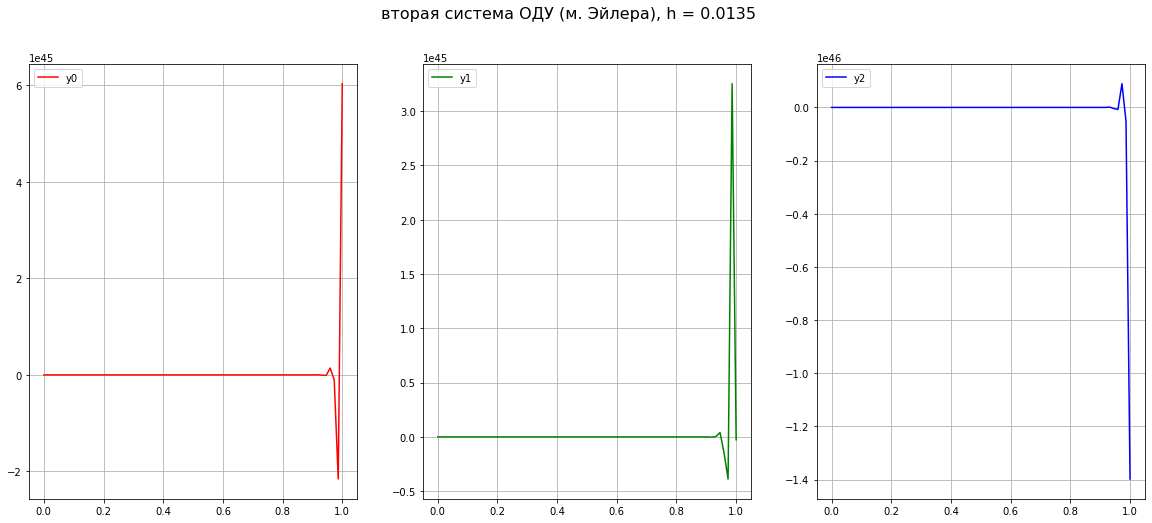

In [34]:
Z_th_Euler = Euler(t_0, T, Z_0, h_th2, B)
make_plots(t_data2, Z_th_Euler, 'вторая система ОДУ (м. Эйлера)')

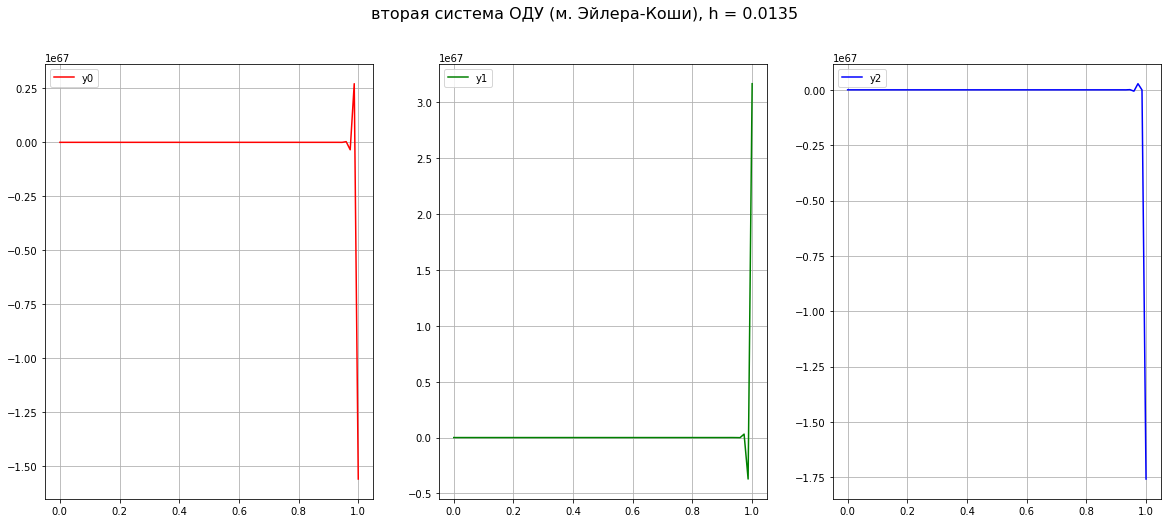

In [35]:
Z_th_EulerCauchy = EulerCauchy(t_0, T, Z_0, h_th2, B)
make_plots(t_data2, Z_th_EulerCauchy, 'вторая система ОДУ (м. Эйлера-Коши)')

Видно, что явные методы все еще неустойчивы для второй задачи. Тогда экспериментально найдем шаг. Также найдем и для первой задачи, хотя получили более стабильный результат, но графики компонент не совпадают с графиком решения задачи неявным методом Эйлера.

In [36]:
h_opt1 = 0.006
n_opt1 = int((T - t_0) / h_opt1) + 1
t_data_opt1 = np.linspace(t_0, T, n_opt1)

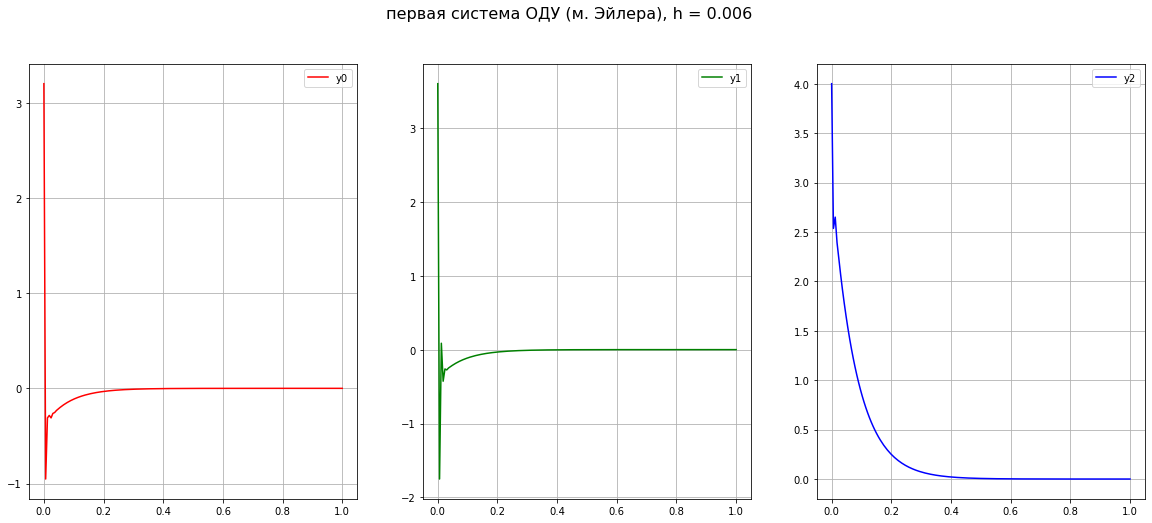

In [37]:
Y_opt_Euler = Euler(t_0, T, Y_0, h_opt1, A)
make_plots(t_data_opt1, Y_opt_Euler, 'первая система ОДУ (м. Эйлера)')

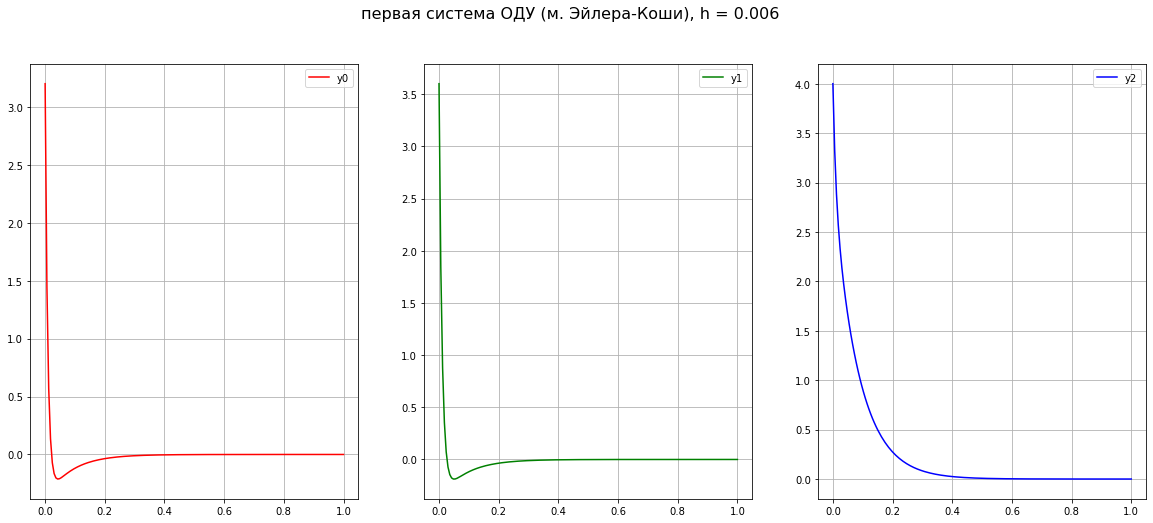

In [38]:
Y_opt_EulerCauchy = EulerCauchy(t_0, T, Y_0, h_opt1, A)
make_plots(t_data_opt1, Y_opt_EulerCauchy, 'первая система ОДУ (м. Эйлера-Коши)')

In [39]:
h_opt2 = 0.001
n_opt2 = int((T - t_0) / h_opt2) + 1
t_data_opt2 = np.linspace(t_0, T, n_opt2)

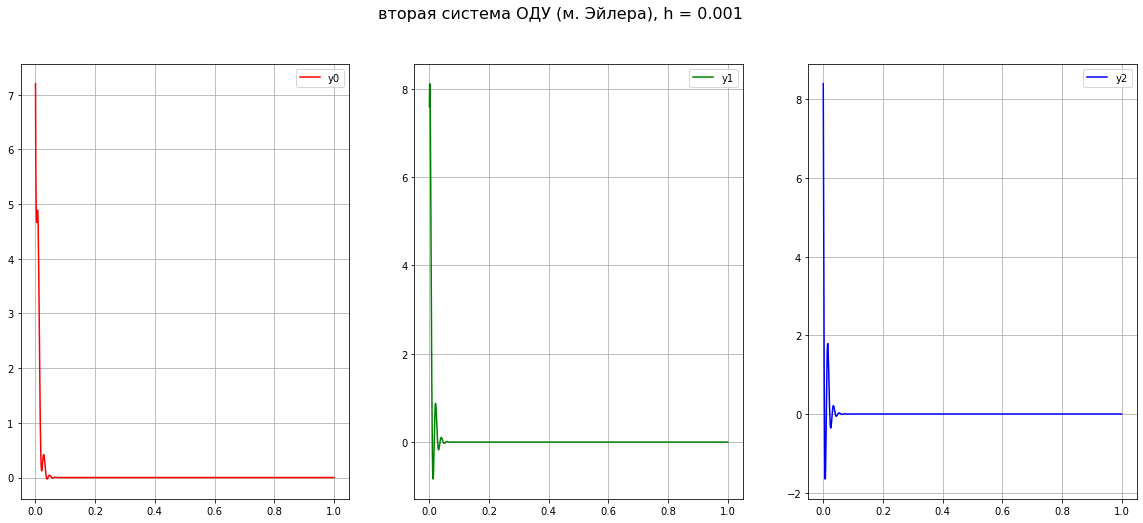

In [40]:
Z_opt_Euler = Euler(t_0, T, Z_0, h_opt2, B)
make_plots(t_data_opt2, Z_opt_Euler, 'вторая система ОДУ (м. Эйлера)')

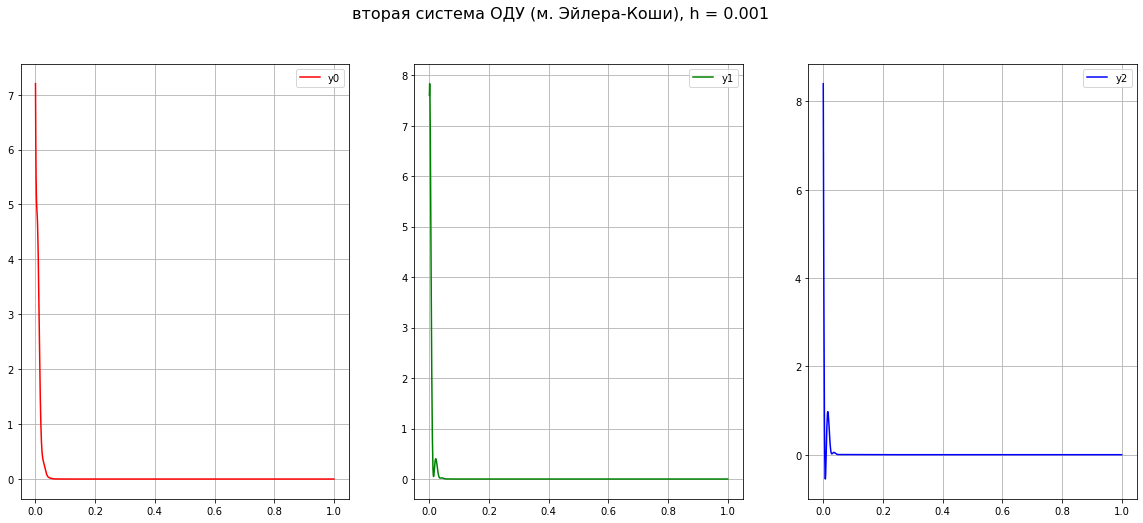

In [41]:
Z_opt_EulerCauchy = EulerCauchy(t_0, T, Z_0, h_opt2, B)
make_plots(t_data_opt2, Z_opt_EulerCauchy, 'вторая система ОДУ (м. Эйлера-Коши)')

Получили графики, которые визуально совпадают с графиком решения задачи неявным методом Эйлера.